<a href="https://colab.research.google.com/github/MohdSiddiq12/Retention-Rates-of-Bank-Customers/blob/main/Retention_rates_of_Bank_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/churn_prediction_simple.csv")

In [ ]:
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
5,10,2132,31,0,0.0,2,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
6,11,3379,40,0,3.0,0,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0
7,12,661,68,0,0.0,1,409.0,3,709,5.0,...,1571.47,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0
8,13,7108,32,0,0.0,2,1096.0,1,89,20.0,...,8372.64,9149.45,21007.52,7564.53,4550.24,9907.91,5161.96,8532.97,8072.33,0
9,14,2438,73,0,0.0,1,44.0,3,409,47.0,...,5728.66,1794.39,137.25,0.33,500.33,5098.90,508.53,2541.22,2612.60,1


In [ ]:
data.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,...,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,...,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,...,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,...,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,...,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,...,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5359287450135575504, *['customer_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5359287450135575504, *['vintage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5359287450135575504, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5359287450135575504, *['gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5359287450135575504, *['customer_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5359287450135575504, *['vintage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5359287450135575504, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5359287450135575504, *['gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5359287450135575504 = autoviz.get_df('df_5359287450135575504')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5359287450135575504, *[[['customer_id', 'vintage'], ['vintage', 'age'], ['age', 'gender'], ['gender', 'dependents']]], **{})
chart

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
# Checking the data set distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [ ]:
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [ ]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
22062    0
22063    0
22064    0
22065    1
22066    1
Name: churn, Length: 22067, dtype: int64

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [ ]:
# Spliting the dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(scaler_X,Y,train_size=0.80,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [ ]:
classifier.fit(X_train,Y_train)
predicted_values = classifier.predict(X_test)  # predicted class
predicted_probability  = classifier.predict_proba(X_test)  # predicted probability

In [ ]:
predicted_values

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
predicted_probability

array([[0.39839521, 0.60160479],
       [0.5954377 , 0.4045623 ],
       [0.56236515, 0.43763485],
       ...,
       [0.53490661, 0.46509339],
       [0.33142836, 0.66857164],
       [0.71457799, 0.28542201]])

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,predicted_values)
cf

array([[2549, 1010],
       [ 310,  545]])

Evauluation Metrics

In [ ]:
# Accuracy
classifier.score(X_test,Y_test)

0.7009515178975986


It is showing a good accuracy, but data is imbalance therefore we must check precision and recall

In [ ]:
# A# Precision
from sklearn.metrics import precision_score as ps
Precision = ps(Y_test,predicted_values)
Precision

0.3504823151125402

Conclusion: approx 35% of result are predicted false positive(FP)

In [ ]:
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(Y_test,predicted_values)
Recall

0.6374269005847953

Conclusion: Out of overall positive person only 64% have been predict positive.

In [ ]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.4522821576763486

In [28]:
from sklearn.metrics import f1_score
F1 = f1_score(Y_test,predicted_values)
F1

0.45228215767634855

Calculating precision, recall , f1-score and support at once

Support: It is nothing but the number of instances for the class 1 and class 0.

In [29]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support = PRF_summary(Y_test,predicted_values)


In [30]:
precision

array([0.89157048, 0.35048232])

In [31]:
recall

array([0.71621242, 0.6374269 ])

In [32]:
f1

array([0.79432845, 0.45228216])

In [33]:
support

array([3559,  855])

It is showing 2 values because first one is of class:0 and second one is for class:1

In [35]:
# Another method for the same

from sklearn.metrics import classification_report
k = classification_report(Y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      3559
           1       0.35      0.64      0.45       855

    accuracy                           0.70      4414
   macro avg       0.62      0.68      0.62      4414
weighted avg       0.79      0.70      0.73      4414



In [36]:

from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(Y_test,predicted_probability[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4415,), (4415,), (4414,))

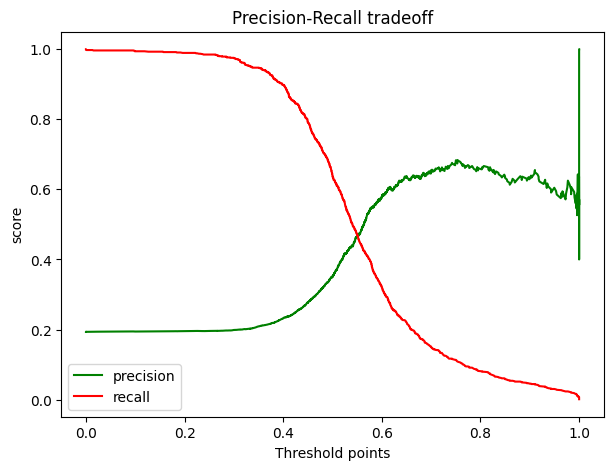

In [37]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color="green",label='precision')
plt.plot(threshold_points,recall_points[:-1],color="red",label='recall')
plt.xlabel('Threshold points')
plt.ylabel("score")
plt.title("Precision-Recall tradeoff")
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(Y_test,predicted_probability[:,1])

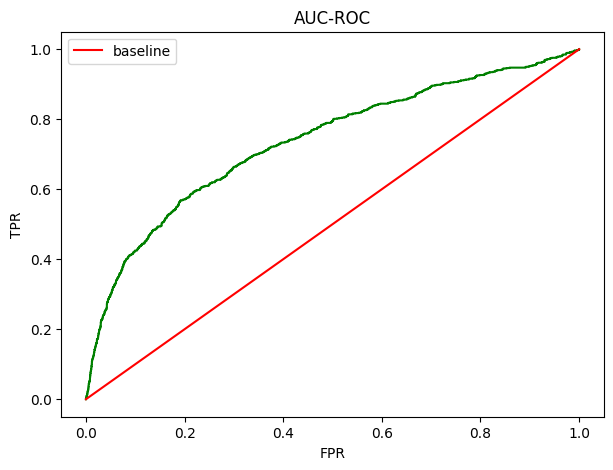

0.735398766655329

In [39]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="green")
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC")
plt.legend()
plt.show()
roc_auc_score(Y_test,predicted_probability[:,1])  # area

Coefficient Plot

In [40]:
# arranging the data
c= classifier.coef_.reshape(-1)
x=X.columns

coeff_plot = pd.DataFrame({'coefficient':c,'variable':x})
coeff_plot.head()

,coefficient,variable
0,-0.178384,vintage
1,-0.093345,age
2,-0.043419,gender
3,0.061432,dependents
4,-0.085679,occupation


In [41]:
# sorting the values
coeff_plot = coeff_plot.sort_values(by='coefficient')
coeff_plot.head()

,coefficient,variable
9,-2.111680,current_balance
13,-0.285243,current_month_credit
18,-0.263725,previous_month_balance
0,-0.178384,vintage
14,-0.175256,previous_month_credit


Text(0.5, 1.0, 'Coefficient plot')

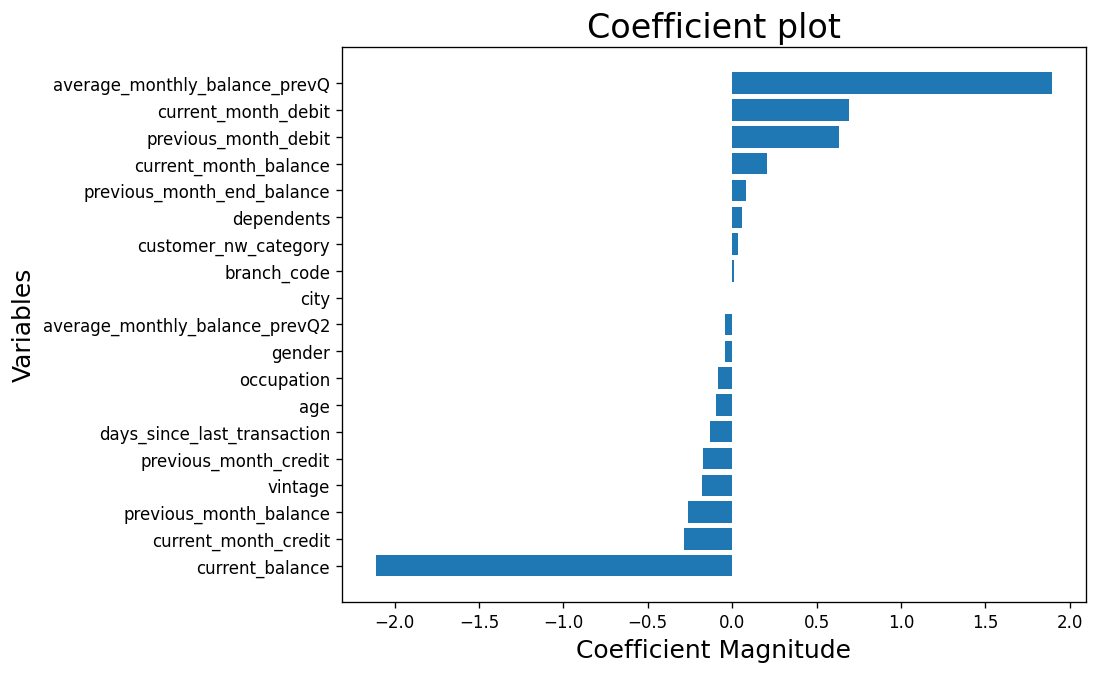

In [42]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficient'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)